## Ejercicios

Autor: Leandro Jorge Fernández Vega

Carrera: Doble Grado en Ingeniería Informática y Matemáticas

Curso: 3º

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
t, y0, z = sp.symbols('t, y_0,  z')
N=75
a,b=0,1
ya=1 #f(a)=ya, donde a es la abscisa inicial

In [ ]:
def f(t,z):
    return z

def sol_exacta(f,a,ya):

  # Definimos y como una función simbólica
  y = sp.Function('y')

  # Declaramos la EDO
  edo = y(t).diff(t)-f(t,y(t))

  # La igualamos a 0
  sp.Eq(edo,0)

  # Resolvemos simbólicamente la EDO
  edo_sol = sp.dsolve(edo)

  # Imponemos las condiciones iniciales
  ics = {y(a): y0}

  # De esta manera haríamos la sustituciones correspondientes
  edo_sol.rhs.subs(t, a),edo_sol.lhs.subs(t, a).subs(ics)

  # Ecuación asociada al PVI
  CI_eq = sp.Eq(edo_sol.lhs.subs(t, a).subs(ics),edo_sol.rhs.subs(t, a))

  # Solución del PVI
  CI_sol = sp.solve(CI_eq)

  # Única solución exacta de nuestro PVI
  sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})

  return sol_exacta

1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.

In [ ]:
def euler_explicito(F,x0,y0,xfinal,N):
  ''' método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  X = np.linspace(x0,xfinal,N+1)
  Y = [y0]; h = (xfinal-x0)/N
  for n in range(N):
      Y.append(Y[n] + h*F(X[n],Y[n]))
  return np.array(X),np.array(Y)


def euler_implicito(F,x0,y0,xfinal,N):
  ''' método de Euler implicito para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  X = np.linspace(x0,xfinal,N+1)
  Y = [y0]; h = (xfinal-x0)/N
  y1 = sp.Symbol('y1') # usaremos esta variable como incógnita
  for n in range(N):   # de la ecuación a resolver en cada iteración
      Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
  return np.array(X),np.array(Y)


def euler_implicito_aprox(F,x0,y0,xfinal,N):
  ''' método de Euler implicito aprox para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  X = np.linspace(x0,xfinal,N+1)
  Y = [y0]; h = (xfinal-x0)/N

  for n in range(N):
      y1 = Y[n] + h*F(X[n],Y[n])    #  valor inicial para una
      Y.append(Y[n]+h*F(X[n+1],y1)) #  iteración de punto fijo
  return np.array(X),np.array(Y)

In [ ]:
xx,yy=euler_explicito(f,a,ya,b,N)
sol_exacta=sol_exacta(f,a,ya)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

print("Valores exactos:\n",valores_exactos)
print("Valores aproximados:\n",yy)
print("Error:\n",abs(valores_exactos-yy))

Valores exactos:
 [1 1.01342261860434 1.02702540389888 1.04081077419239 1.05478118025366
 1.06893910574725 1.08328706767496 1.09782761682338 1.11256333821731
 1.12749685157938 1.14263081179572 1.15796790938803 1.17351087099181
 1.18926245984118 1.20522547626009 1.22140275816017 1.23779718154525
 1.25441166102266 1.27124915032140 1.28831264281726 1.30560517206495
 1.32312981233744 1.34088967917248 1.35888792992651 1.37712776433596
 1.39561242508609 1.41434519838750 1.43332941456034 1.45256844862637
 1.47206572090898 1.49182469764127 1.51184889158225 1.53214186264135
 1.55270721851134 1.57354861530962 1.59466975822832 1.61607440219289
 1.63776635252977 1.65974946564280 1.68202764969889 1.70460486532275
 1.72748512630109 1.75067250029610 1.77417110956869 1.79798513171127
 1.82211880039051 1.84657640609995 1.87136229692281 1.89648087930495
 1.92193661883829 1.94773404105468 1.97387773223045 2.00037234020178
 2.02722257519099 2.05443321064389 2.08200908407846 2.10995509794482
 2.13827622049

2. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [ ]:
def euler_mejorado(F,x0,y0,xfinal,N):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n] + h/2,Y[n] + (h/2)*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

def euler_modificado(F,x0,y0,xfinal,N):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + (h/2)*(F(X[n],Y[n])+F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

In [ ]:
xx,yy_em=euler_mejorado(f,a,ya,b,N)
xx,yy_emod=euler_modificado(f,a,ya,b,N)

**Ejercicios:**
3. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

In [ ]:
def Taylor2(F,x0,y0,xfinal,N):
  ''' método del método de Taylor de orden 2 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''

  t, z = sp.symbols('t, z')

  X = np.linspace(x0,xfinal,N+1)
  Y = [y0]; h = (xfinal-x0)/N

  def F1(t,z):
      return F(t,z)

  def F2(t,z):
      return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)

  for n in range(N):
      Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
  return np.array(X),np.array(Y)

In [ ]:
xx,yy_taylor2=Taylor2(f,a,ya,b,N)

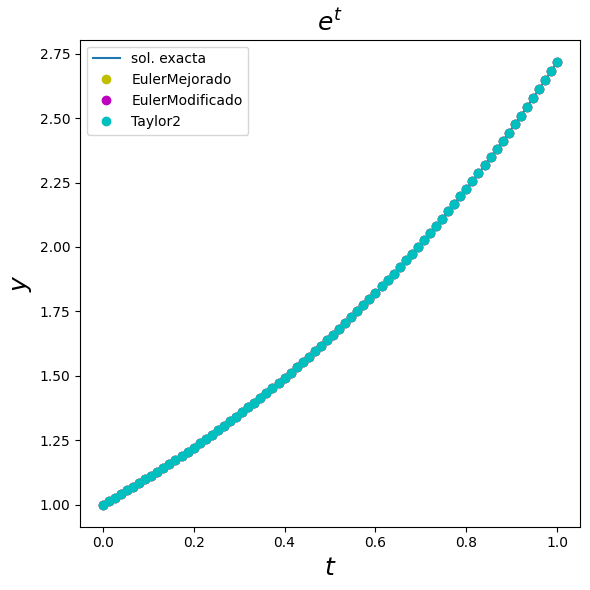

In [ ]:
# y ya estaría todo preparado para poder realizar la correspondiente
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
#xx = np.linspace(a, b, N+1)
ax.plot(xx, valores_exactos, label="sol. exacta")
ax.plot(xx, yy_em,'yo',label="EulerMejorado")
ax.plot(xx, yy_emod,'mo', label="EulerModificado")
ax.plot(xx, yy_taylor2,'co', label="Taylor2")
ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

4. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

In [ ]:
def Taylor3(F,x0,y0,xfinal,N):
  ''' método del método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''

  t, z = sp.symbols('t, z')

  X = np.linspace(x0,xfinal,N+1)
  Y = [y0]; h = (xfinal-x0)/N

  def F1(t,z):
    return F(t,z)

  def F2(t,z):
    return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)

  def F3(t,z):
    return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)


  for n in range(N):
      Y.append(Y[n]+h*F1(X[n],Y[n]) + h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}) + h**3/6*F3(t,z).subs({t:X[n], z:Y[n]}))
  return np.array(X),np.array(Y)

In [ ]:
xx,yy=Taylor3(f,a,ya,b,N)
#sol_exacta=sol_exacta(f,a,ya)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

print("Valores exactos:\n",valores_exactos)
print("Valores aproximados:\n",yy)
print("Error:\n",abs(valores_exactos-yy))

Valores exactos:
 [1 1.01342261860434 1.02702540389888 1.04081077419239 1.05478118025366
 1.06893910574725 1.08328706767496 1.09782761682338 1.11256333821731
 1.12749685157938 1.14263081179572 1.15796790938803 1.17351087099181
 1.18926245984118 1.20522547626009 1.22140275816017 1.23779718154525
 1.25441166102266 1.27124915032140 1.28831264281726 1.30560517206495
 1.32312981233744 1.34088967917248 1.35888792992651 1.37712776433596
 1.39561242508609 1.41434519838750 1.43332941456034 1.45256844862637
 1.47206572090898 1.49182469764127 1.51184889158225 1.53214186264135
 1.55270721851134 1.57354861530962 1.59466975822832 1.61607440219289
 1.63776635252977 1.65974946564280 1.68202764969889 1.70460486532275
 1.72748512630109 1.75067250029610 1.77417110956869 1.79798513171127
 1.82211880039051 1.84657640609995 1.87136229692281 1.89648087930495
 1.92193661883829 1.94773404105468 1.97387773223045 2.00037234020178
 2.02722257519099 2.05443321064389 2.08200908407846 2.10995509794482
 2.13827622049

5. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional

In [ ]:
def Runge_Kutta4(F,x0,y0,xfinal,N):

    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6

    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

6. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

In [ ]:
class Butcher: #clase para los arreglos de Butcher
    def __init__(self,a,b,c): #Constructor
        self.a = a
        self.b = b
        self.c = c

    def __repr__(self): #Representacion
        s = ''
        for i in range(len(self.a)):
            s += "{: >6} │ ".format(str(self.c[i])[:6])
            for j in range(len(self.a)):
                s += "{: >6} ".format(str(self.a[i][j])[:6])
            s += '\n'
        s += "───────┼─"
        for i in range(len(self.a)):
            s += "───────"
        s += "\n       │ "
        for i in range(len(self.a)):
            s += "{: >6} ".format(str(self.b[i])[:6])
        return s

    @classmethod #Decorator para metodo de clase
    def create_matrix(self, matrix):
        a = []
        b = []
        c = []

        for i in range(len(matrix)-1):
            c.append(matrix[i][0])
            b.append(matrix[len(matrix)-1][i+1])
            v = []

            for j in range(len(matrix)-1):
                v.append(matrix[i][j+1])
            a.append(v)
        return Butcher(a,b,c)

    def is_explicit(self):
        explicit = True
        for i in range(len(self.a)):
            for j in range(i+1, len(self.a)):
                if self.a[i][j] != 0:
                    explicit = False
        return explicit


def RK_Butcher(F,x0,y0,xfinal,butcher,N):
  ''' método Runge-Kutta explícito para resolver el PVI a partir de un arreglo de Butcher dado
    X, Y    = integrate(F,x0,y0,xfinal,N)
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...,y[N-1]}
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función dada por el usuario que devuelve el
            array F(x,y)={y'[0], y'[1],...,yy'[N-1]}
    butcher = arreglo de Butcher para el método
  '''

  if ( butcher.is_explicit() ):
      def phi(F,x0,y0,h,butcher):
          tam = len(butcher.a)
          k0 = F(x0,y0)
          k = np.array([k0])

          for i in range(1, tam):
              kx = 0
              for j in range(i):
                  kx += k[j] * butcher.a[i][j]
              k = np.append(k, F(x0 + h*butcher.c[i], y0 + h*kx))

          return np.dot(butcher.b, k)


      X = np.linspace(x0,xfinal,N+1)
      Y = [y0]; h = (xfinal-x0)/N

      for n in range(N):
          Y.append( Y[n] + h*phi(F,X[n],Y[n],h, butcher) )

      return np.array(X),np.array(Y)
  else:
      print("Debe tratarse de un método implícito")
      return None

7. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

In [ ]:
def Adams_Bashford2(F,x0,y0,xfinal,N):

  ''' Método de Adams-Bashforth (con k = 2) para resolver
  el problema de valores iniciales {y}' = {F(x,{y})},
  donde    {y} = {y[0],y[1],...y[N-1]}.
  X,Y    = integrate(F,x0,y0,xfinal,N).
  x0,y0  = condiciones iniciales
  xfinal = valor final de x
  N      = número de subintervalos de la partición
  h      = incremento de x usado en la integración
  F      = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''

  def AB2(F,x0,y0,y1,h):
      return (3*F(x0+h,y1)-F(x0,y0))/2

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
  y1 = y0 + h*F(x0,y0); Y = [y0,y1]
  for n in range(N-1):
      Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
  return np.array(X),np.array(Y)

In [ ]:
def Adams_Moulton(F,x0,y0,xfinal,N):
  ''' Método de Adams-Moulton q=1, m=0, r=0 (con k = 1) para resolver
  el problema de valores iniciales
  {y}'    = {F(x,{y})}, donde
  {y}     = {y[0],y[1],...y[N-1]}.
  X,Y     = integrate(F,x0,y0,xfinal,N).
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  def AM(F,x0,y0,t,h):
      return 1/2*(F(x0,y0)+F(x0+h,t))

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
#Definimos una variable simbolica para resolver la ecuacion
  t = sp.Symbol('t')
  Y = [y0]
  for n in range(N):
      Y.append(sp.solve(Y[n]+h*AM(F,X[n],Y[n],t,h)-t,t)[0])
  return np.array(X),np.array(Y)

In [ ]:
def Milne_Simpson(F,x0,y0,xfinal,N):
  ''' Método de Milne-simpson (q=2, m=0, r=0) para resolver
  el problema de valores iniciales {y}' = {F(x,{y})},
  donde
  {y}     = {y[0],y[1],...y[N-1]}.
  X,Y     = integrate(F,x0,y0,xfinal,N).
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  def MS(F,x0,y0,y1,y2,h):
      return (F(x0,y0)+4*F(x0+h,y1)+F(x0+2*h,y2))/3

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
  #Definimos una variable simbolica para resolver la ecuacion
  t = sp.Symbol('t')
  y1 = y0 + h*F(x0,y0);
  Y = [y0,y1]
  for n in range(N-1):
      Y.append(sp.solve(Y[n]+h*MS(F,X[n],Y[n],Y[n+1],t,h)-t,t)[0])
  return np.array(X),np.array(Y)

In [ ]:
def Nystrom(F,x0,y0,xfinal,N):
  ''' Método de Nystrom (q=2, m=0, r>=0) para r=1 y k=2 para resolver
  el problema de valores iniciales
  {y}'    = {F(x,{y})}, donde
  {y}     = {y[0],y[1],...y[N-1]}.
  X,Y     = integrate(F,x0,y0,xfinal,N).
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  def Nys(F,x0,y1,h):
      return 2*F(x0+h,y1)

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/float(N)
  y1 = y0 + h*F(x0,y0); Y = [y0,y1]
  for n in range(N-1):
      Y.append(Y[n] + h*Nys(F,X[n],Y[n+1],h))
  return np.array(X),np.array(Y)

In [ ]:
def Newton_Cotes(F,x0,y0,xfinal,N):
  ''' Método de NewtonCotes (q=k, m=r) para m=r=0 y k=1 para resolver
  el problema de valores iniciales
  {y}'    = {F(x,{y})}, donde
  {y}     = {y[0],y[1],...y[N-1]}.
  X,Y     = integrate(F,x0,y0,xfinal,N).
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''
  def NC(F,x0,y0,y1,h):
      return (F(x0,y0) + F(x0+h,y1))/2
  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
  t = sp.Symbol('t')
  Y = [y0]
  for n in range(N):
      Y.append(sp.solve(Y[n]+h*NC(F,X[n],Y[n],t,h)-t,t)[0])
  return np.array(X),np.array(Y)

8. Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

In [ ]:
def ABM5(F,x0,y0,xfinal,N):
  ''' Método predictor-corrector Adams-Bashforth-Moulton de orden 5 para resolver el PVI
  {y}'    = F(x,{y}), donde
  {y}     = {y[0],y[1],...,y[N-1]}
  X,Y     = integrate(F,x0,y0,xfinal,N)
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}
  '''

  h = (xfinal-x0)/N
  X = np.linspace(x0,xfinal,N+1)
  Y = np.zeros(N+1)

  # usaremos alguno de los métodos de un paso vistos anteriormente para calcular las semillas
  # en este caso volveremos a usar Euler explicito para x_1,...,x_4
  _, Y[0:5] = euler_explicito(F,x0,y0,x0+4*h,4)

  K1 = F(X[4],Y[4])
  K2 = F(X[3],Y[3])
  K3 = F(X[2],Y[2])
  K4 = F(X[1],Y[1])
  k5 = F(X[0],Y[0])
  for i in range(4,N):
    K5 = K4
    K4 = K3
    K3 = K2
    K2 = K1
    K1 = F(X[i],Y[i])
    # predictor
    Y[i+1] = Y[i] + h*(1901*K1-2774*K2+2616*K3-1274*K4+251*K5)/720
    K0 = F(X[i+1],Y[i+1])
    # corrector
    Y[i+1] = Y[i] + h*(251*K0+646*K1-264*K2+106*K3-19*K4)/720

  return np.array(X),np.array(Y)

In [ ]:
xx,yy_abm5=ABM5(f,a,ya,b,N)

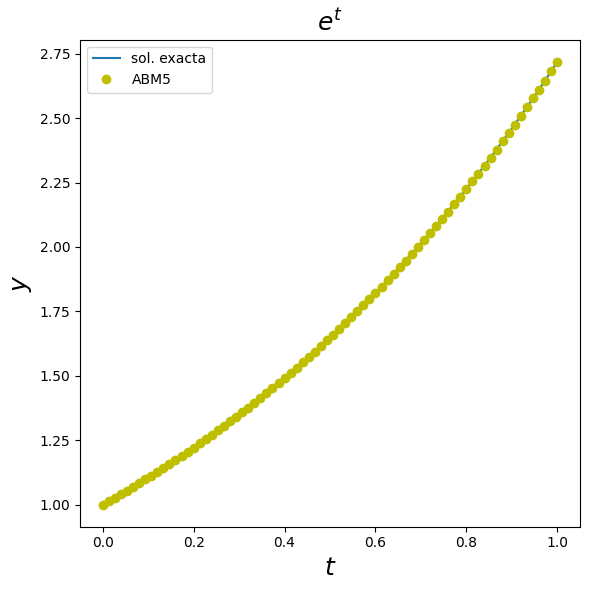

In [ ]:
# y ya estaría todo preparado para poder realizar la correspondiente
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
#xx = np.linspace(a, b, 100)
ax.plot(xx, valores_exactos, label="sol. exacta")
ax.plot(xx, yy_abm5,'yo',label="ABM5")
ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

Otros métodos útiles:

In [ ]:
def Adams_Bashford3(F,x0,y0,xfinal,N):

  ''' Método de Adams-Bashforth (con k = 3) para resolver
  el problema de valores iniciales {y}' = {F(x,{y})},
  donde    {y} = {y[0],y[1],...y[N-1]}.
  X,Y    = integrate(F,x0,y0,xfinal,N).
  x0,y0  = condiciones iniciales
  xfinal = valor final de x
  N      = número de subintervalos de la partición
  h      = incremento de x usado en la integración
  F      = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
  '''

  def AB3(F,x0,y0,y1,y2,h):
      return (23*F(x0+2*h,y2)-16*F(x0+h,y1) + 5*F(x0,y0))/12

  X = np.linspace(x0,xfinal,N+1)
  h = (xfinal-x0)/N
  y1 = y0 + h*F(x0,y0)
  y2 = y1 + h*(3*F(x0+h,y1)-F(x0,y0))/2
  Y = [y0,y1,y2]
  for n in range(N-2):
      Y.append(Y[n+2] + h*AB3(F,X[n],Y[n],Y[n+1],Y[n+2],h))
  return np.array(X),np.array(Y)

In [ ]:
def ABM3(F,x0,y0,xfinal,N):

  ''' Método predictor-corrector Adams-Bashforth-Moulton de orden 3 para resolver el PVI
  {y}'    = F(x,{y}), donde
  {y}     = {y[0],y[1],...,y[N-1]}
  X,Y     = integrate(F,x0,y0,xfinal,N)
  x0,y0   = condiciones iniciales
  xfinal  = valor final de x
  N       = número de subintervalos de la partición
  h       = incremento de x usado en la integración
  F       = función suplida por el usuario que devuelve el
          array F(x,y) = {y'[0],y'[1],...,y'[N-1]}
  '''

  h = (xfinal-x0)/N
  X = np.linspace(x0,xfinal,N+1)
  Y = np.zeros(N+1)

  # usaremos alguno de los métodos de un paso vistos anteriormente para calcular las semillas
  # en este caso volveremos a usar Euler explicito para x_1,...,x_4
  _, Y[0:3] = eulerexplicito(F,x0,y0,x0+2*h,2)

  K1 = F(X[1],Y[1])
  K2 = F(X[0],Y[0])
  for i in range(2,N):
      K3 = K2
      K2 = K1
      K1 = F(X[i],Y[i])
      # predictor
      Y[i+1] = Y[i] + h*(23*K1-16*K2+5*K3)/12
      K0 = F(X[i+1],Y[i+1])
      # corrector
      Y[i+1] = Y[i] + h*(9*K0+19*K1-5*K2+K3)/24
  return np.array(X),np.array(Y)